## Predicting Credit Card Payment / Default
### Problem understanding and definition
**The Taiwanese Financial Institution (TFI)** wants us to build a predictive model to help the institution detect which customers will default on their credit card payment since they have been detecting an increase in defaults among their customers. This situation is negatively affecting the revenue of the company and they know they can do something about it if they could anticipate which credit card holders are going to default on their next payment and why, i.e. what are the features that are most associated with default.

### Data Collection & Preparation
For this project, we don't need to get the data ourself using the extract, transform, load (ETL) technologies since TFI has handed us the data about customers that is available; they have two types of data about each customer: profile data and historical data about payments. Find below the metadata about the dataset:
* SEX: Gender (1 = male; 2 = female).
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* LIMIT_BAL: Amount of given credit (New Taiwan dollar); it includes both the individual consumer credit and his/her family (supplementary) credit.
* PAY_1 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September 2005) as follows: 0 = the repayment status in September 2005; 1 = repayment status in August 2005; . . .; 6 = repayment status in April 2005. The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 months; . . .; 8 = payment delay for 8 months; 9 = payment delay for 9 months and above.
* BILL_AMT1-BILL_AMT6: Amount of bill statement (New Taiwan dollar). X12 = amount of bill statement in September 2005; X13 = amount of bill statement in August 2005; . . .; X17 = amount of bill statement in April 2005.
* PAY_AMT1-PAY_AMT6: Amount of previous payment (New Taiwan dollar).
* Default payment: Default isdefined as a customer missing a payment for a single month.

### Goal
For this project, there are only two possibilities: the customer either pays or defaults, i.e. our target variable can only have two possible values or categories, therefore it is a binary classification task and we will use the features contained in the dataset (all columns except for our target variable, default payment) to build predictive classification model(s) & select the best model that predicts which customers will default on their next credit card payment, based on both types of features: personal information and history of payments.

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### Load the data

In [2]:
df = pd.read_csv('../Data/credit_card_default.csv', index_col="ID")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Exploratory Data Analysis

In [3]:
#rename target
df = df.rename(columns={'default payment next month': 'default'})

# Convert column names to lowercase
df.rename(columns=lambda x: x.lower(), inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  30000 non-null  int64
 1   sex        30000 non-null  int64
 2   education  30000 non-null  int64
 3   marriage   30000 non-null  int64
 4   age        30000 non-null  int64
 5   pay_1      30000 non-null  int64
 6   pay_2      30000 non-null  int64
 7   pay_3      30000 non-null  int64
 8   pay_4      30000 non-null  int64
 9   pay_5      30000 non-null  int64
 10  pay_6      30000 non-null  int64
 11  bill_amt1  30000 non-null  int64
 12  bill_amt2  30000 non-null  int64
 13  bill_amt3  30000 non-null  int64
 14  bill_amt4  30000 non-null  int64
 15  bill_amt5  30000 non-null  int64
 16  bill_amt6  30000 non-null  int64
 17  pay_amt1   30000 non-null  int64
 18  pay_amt2   30000 non-null  int64
 19  pay_amt3   30000 non-null  int64
 20  pay_amt4   30000 non-null  int64
 21  pay_amt5   3

In [5]:
df.nunique()

limit_bal       81
sex              2
education        7
marriage         3
age             56
pay_1           11
pay_2           11
pay_3           11
pay_4           11
pay_5           10
pay_6           10
bill_amt1    22723
bill_amt2    22346
bill_amt3    22026
bill_amt4    21548
bill_amt5    21010
bill_amt6    20604
pay_amt1      7943
pay_amt2      7899
pay_amt3      7518
pay_amt4      6937
pay_amt5      6897
pay_amt6      6939
default          2
dtype: int64

In [6]:
# Lets check the summary statistics of the variables 
df.describe(include = 'all')

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df['education'].value_counts(sort=False)

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: education, dtype: int64

### For the Numerical Features

In [8]:
# getting the groups of features
bill_amt_features = ['bill_amt'+ str(i) for i in range(1,7)]
pay_amt_features = ['pay_amt'+ str(i) for i in range(1,7)]
numerical_features = ['limit_bal','age'] + bill_amt_features + pay_amt_features
target = ['default']

In [9]:
# We are going to use a histogram to visualize the distribution of the Numerical Features

def desc_num_feature(feature, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature, size=15)
    desc = df[feature].describe().round(2).to_string()
    plt.figtext(1.0,0.15, desc, fontsize=17)

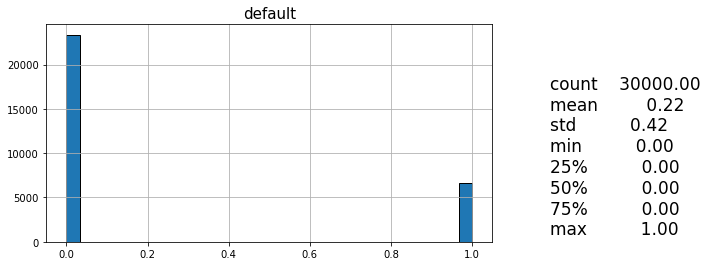

In [10]:
desc_num_feature('default')

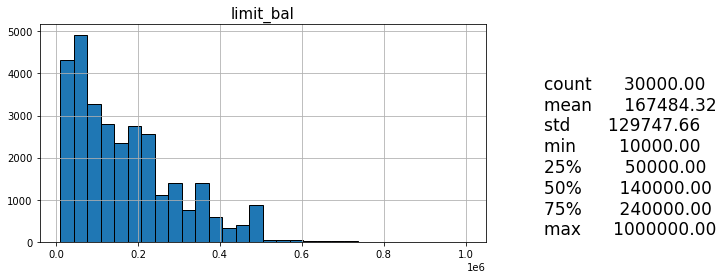

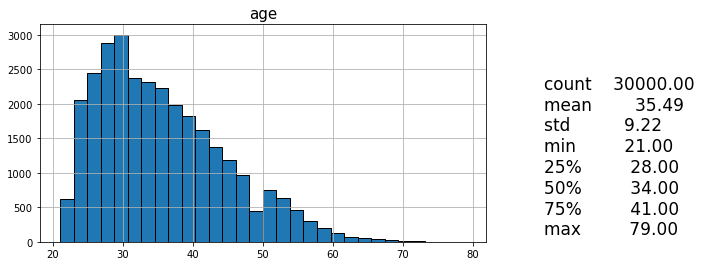

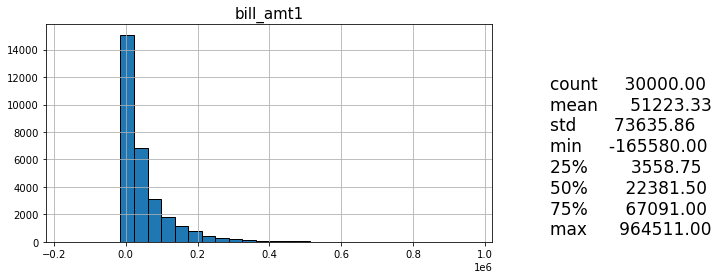

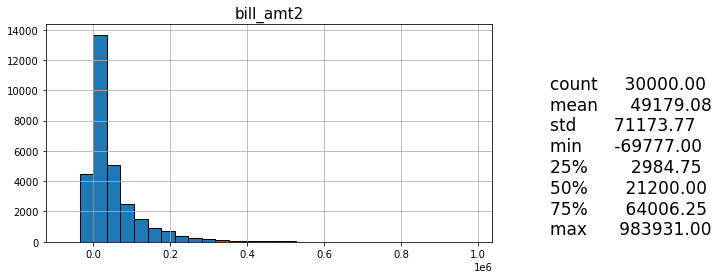

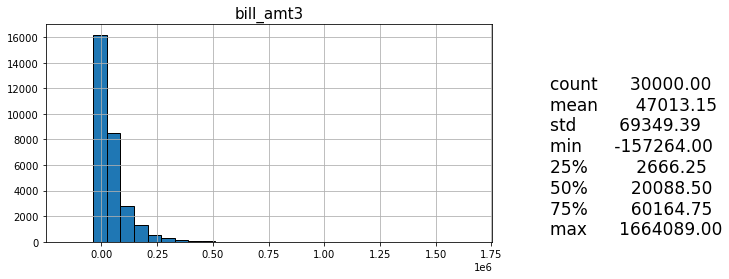

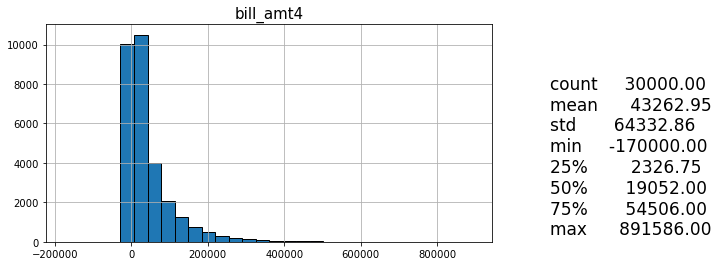

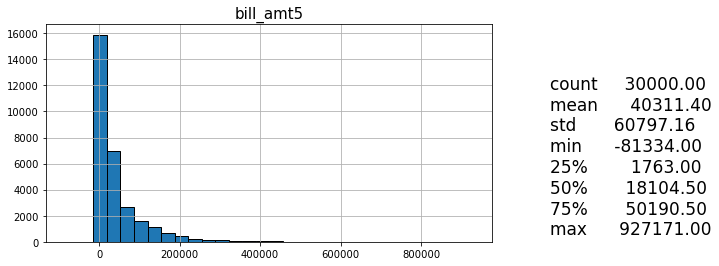

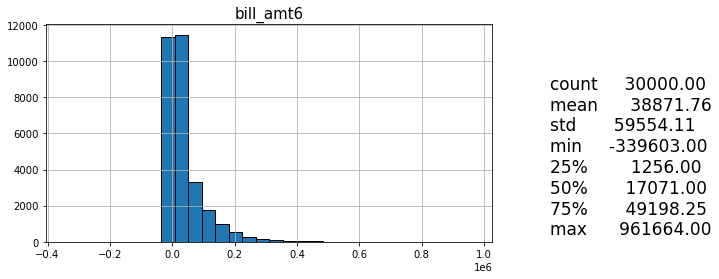

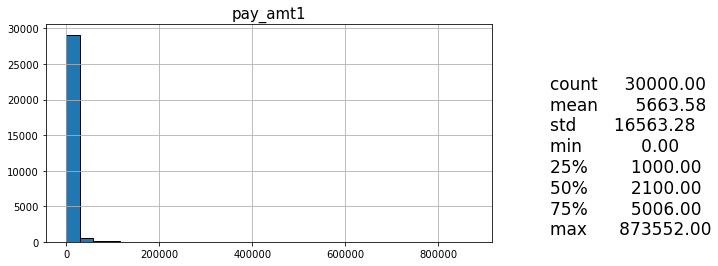

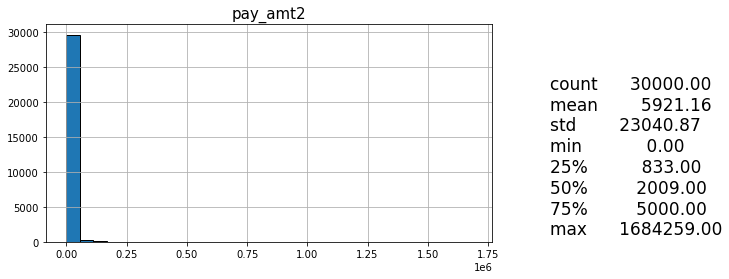

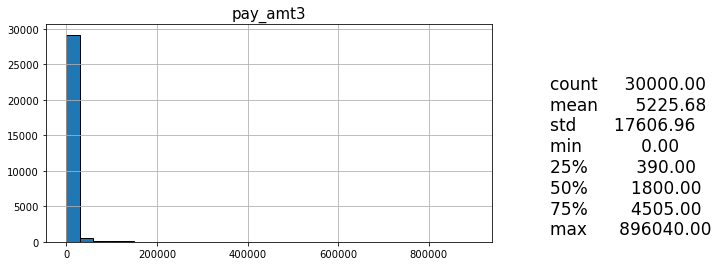

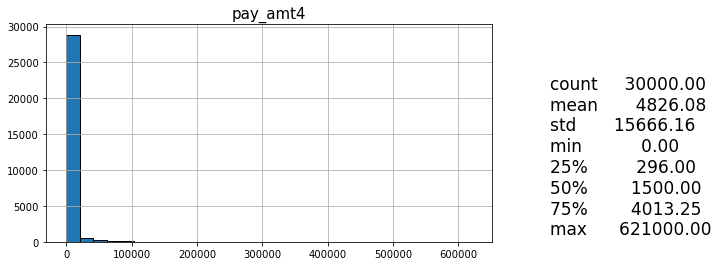

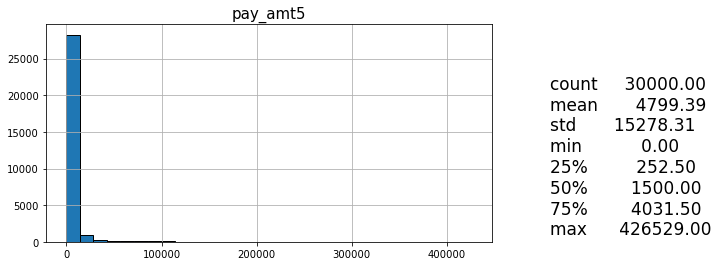

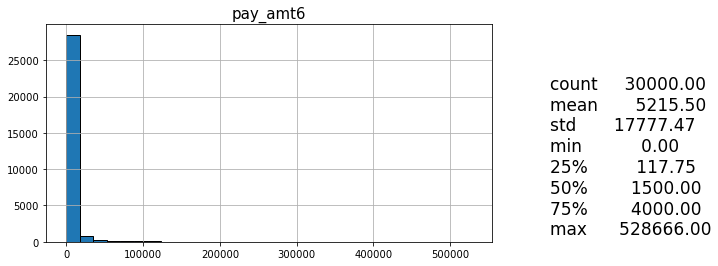

In [11]:
for x in numerical_features:
    desc_num_feature(x)

### For the Categorical Features

In [12]:
cat_features = ['sex','education','marriage']
def plot_categorical(feature):
    count = df[feature].value_counts()
    percent = 100*df[feature].value_counts(normalize=True)
    dfc = pd.DataFrame({'count':count, 'percent':percent.round(1)})
    #print(dfc)
    count.plot(kind='bar', title=feature + str(' feature'));
    plt.figtext(1.0,0.15, dfc.to_string(), fontsize=17)

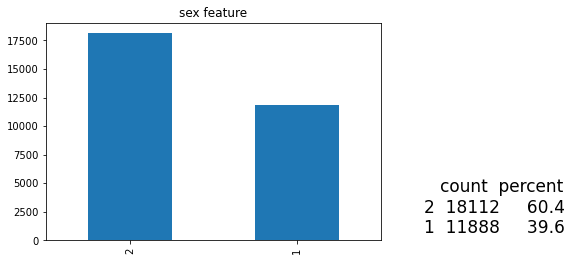

In [13]:
plot_categorical('sex')

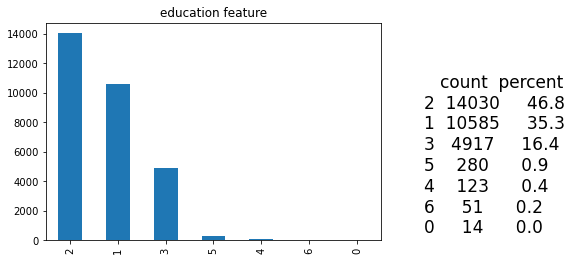

In [14]:
plot_categorical('education')

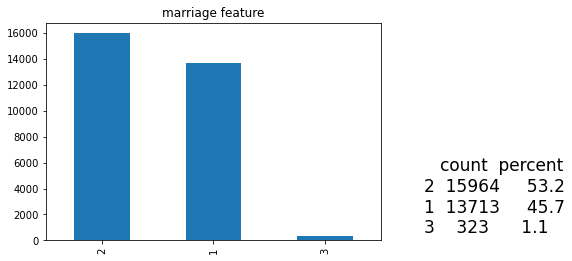

In [15]:
plot_categorical('marriage')

From above, we can make the following observations:
* The dataset has 30000 observations/rows and 24 features/columns.
* For the categorical features which we will later encode:
    - The **sex column** has 2 unique values, 1 = male & 2 = female. 
    - The **education column** has values from 0 to 6, which is strange because we were supposed to get only numbers from 1 to 4.
    - The **marriage column** has as expected 3 unique values, 1 = married; 2 = single & 3 = others.
* Now for the numerical features:
    - In the **limit_bal column** which represent the amount of given credit, the values range from min of 10000 to max of  1 million with a mean of about 167000 which is expected.
    - In the **age column**, we also see values in the range of what we expect: from 21 to 79 years. 
    - In the **PAY_1 - PAY_6** columns representing the history of past payment, we see values such as -2 and 0 which aren't represented in the description, so we will work with the assumption that -2, -1, and 0 correspond to the people who were not delayed in their payments that month since the number of the positive integer valuescorresponds to the number of months the customer has delayed in their payments.
    - From the **BILL_AMT1-BILL_AMT6** features which indicate the bill amount in the last 6 months we can see that all the min values are negative values, which is actually the way the financial institution tells the customer that they have a credit or a positive balance.
    - Finally for the **pay_amt** columns which correspond with the history of payments the customer has made. As expected, the minimum value in every case is zero; those correspond with the customers that did not make any payment. The means of these features are significantly lower than the means of the bill amount, indicating that, on average, customers pay much less than they are billed.

### Relationship Between The Features

In [16]:
df[numerical_features].corr()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
limit_bal,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
age,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
bill_amt1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
bill_amt2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
bill_amt3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
bill_amt4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
bill_amt5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
bill_amt6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
pay_amt1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
pay_amt2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


In [17]:
# Lets look at the relationship between the numerical features
# sns.pairplot(df[numerical_features], plot_kws={"s": 2}, diag_kind='kde');

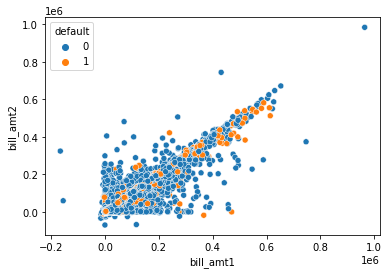

In [18]:
sns.scatterplot(x='bill_amt1', y='bill_amt2', hue='default', data=df);

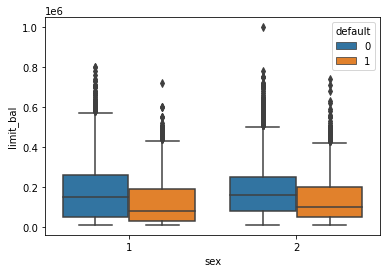

In [19]:
# For numerical, categorical & target feature
sns.boxplot(x='sex', y='limit_bal', hue='default', data=df);

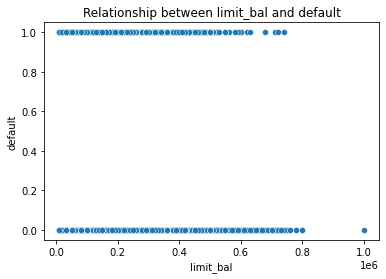

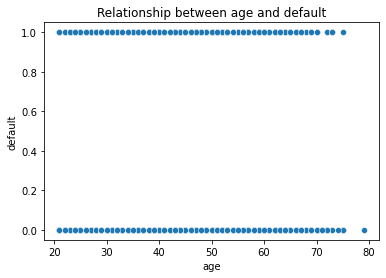

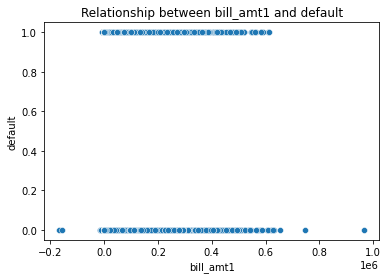

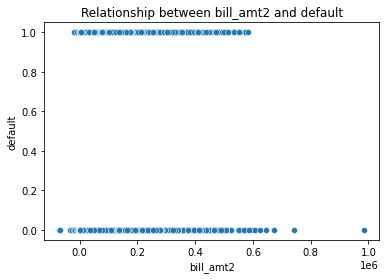

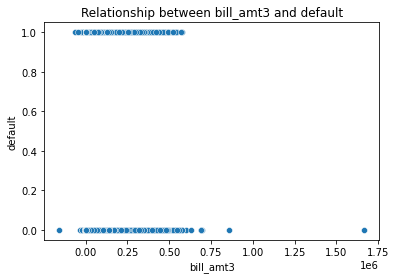

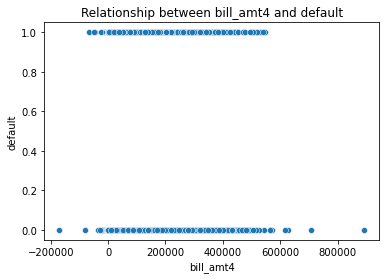

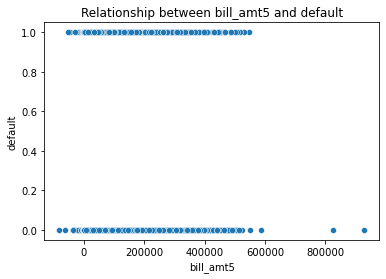

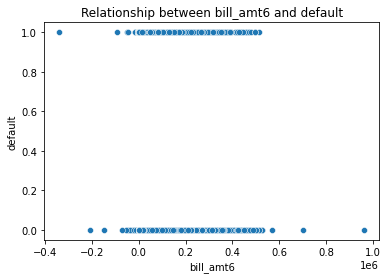

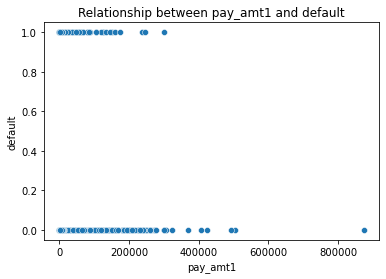

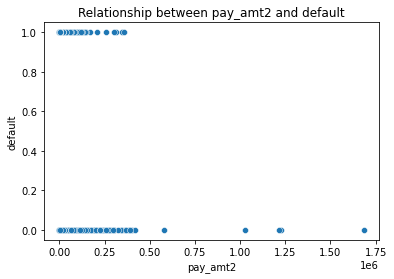

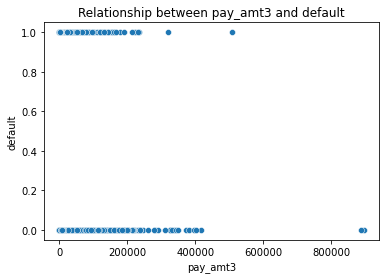

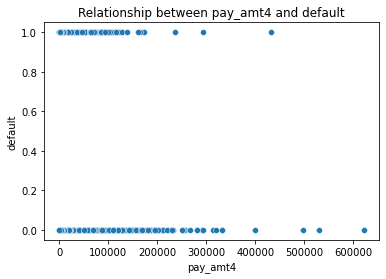

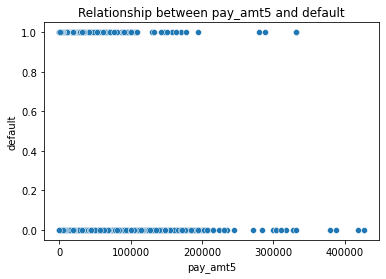

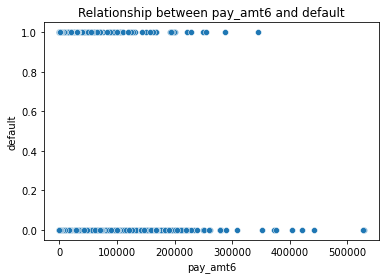

In [20]:
# For numerical features & target
for a in numerical_features:
    for b in target:
        _ = sns.scatterplot(x=a,y=b,data=df)
        plt.title('Relationship between ' +a+ ' and ' +b)
#       plt.savefig('../Images/Scatterplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()